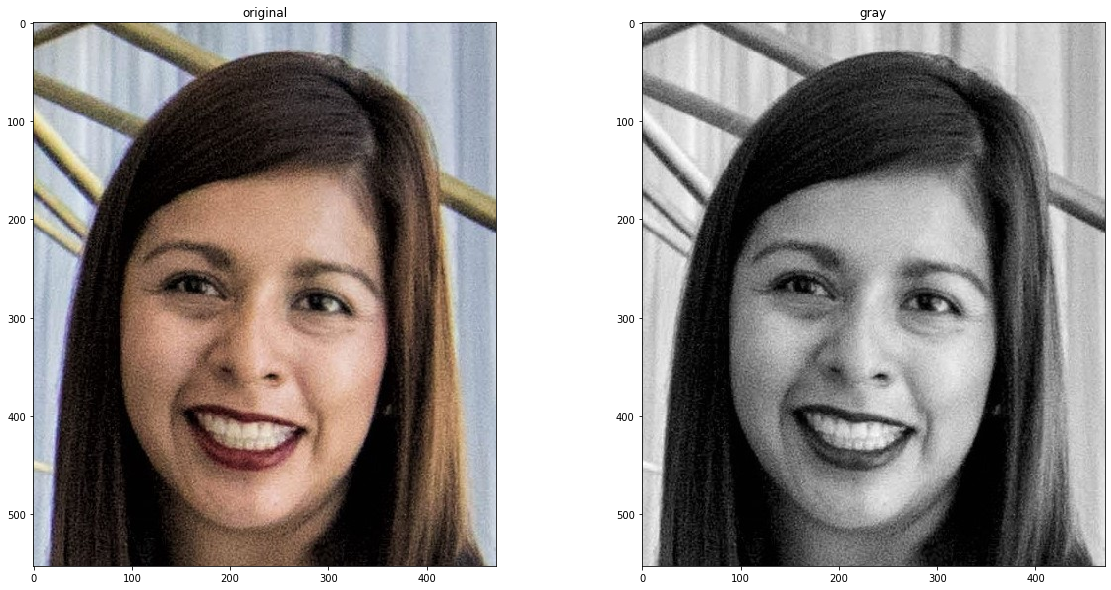

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize']=[20,10]

image=cv2.imread('face.jpeg')

training_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
training_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.title('original')
plt.imshow(training_image)
plt.subplot(122)
plt.title('gray')
plt.imshow(training_gray,cmap='gray')
plt.show()


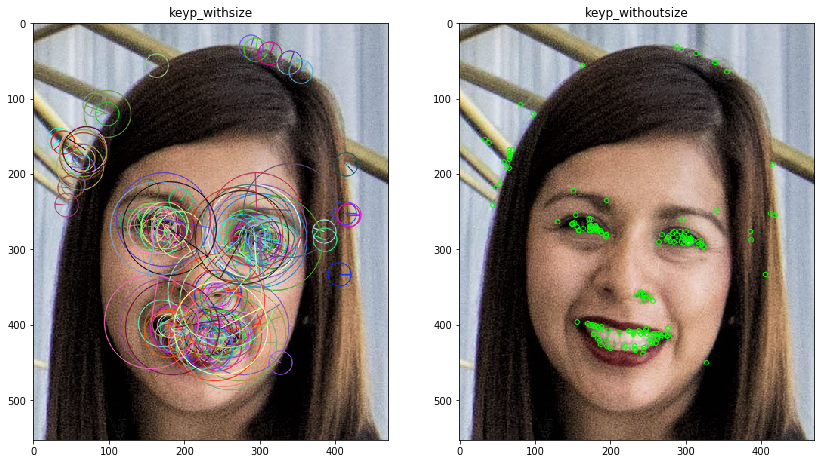

In [4]:
#now we have to get orb descripters on the training_images
import copy

plt.rcParams['figure.figsize']=[14.0,17.0]
orb=cv2.ORB_create(200,2.0)

keypoints ,descripters = orb.detectAndCompute(training_gray,None)

keyp_withsize=copy.copy(training_image)
keyp_withoutsize=copy.copy(training_image)

cv2.drawKeypoints(training_image,keypoints,keyp_withoutsize,color=(0,255,0))
cv2.drawKeypoints(training_image,keypoints,keyp_withsize,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(121)
plt.title('keyp_withsize')
plt.imshow(keyp_withsize)
plt.subplot(122)
plt.title('keyp_withoutsize')
plt.imshow(keyp_withoutsize)
plt.show()

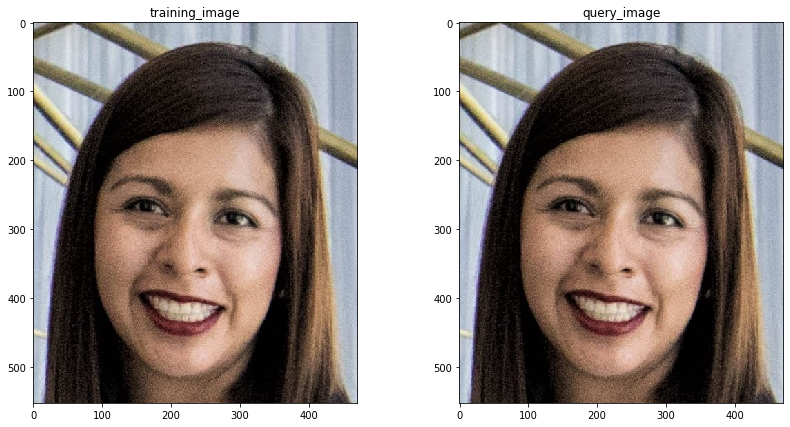

821
821
821


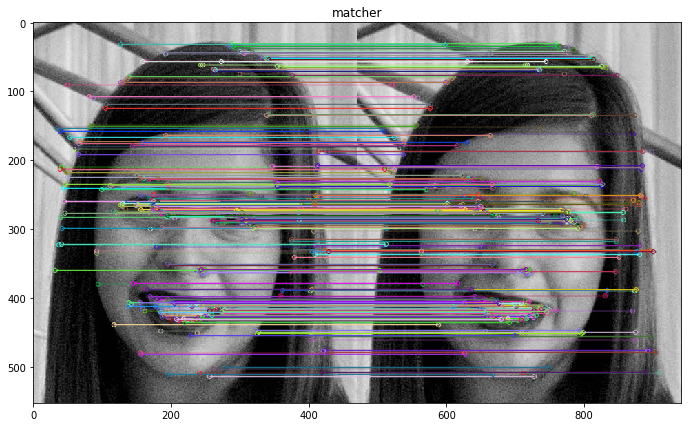

In [12]:
#Now perform same keypoint detection on the query image and perform matching of features


plt.rcParams['figure.figsize']=[14.0,7.0]

query_image=copy.copy(training_image)

ob=cv2.ORB_create(1000,2.0)

keypoints_train, descripters_train=ob.detectAndCompute(training_image,None)
keypoints_query, descripters_query=ob.detectAndCompute(query_image,None)

bs=cv2.BFMatcher(cv2.NORM_HAMMING2,crossCheck=True)

matches=bs.match(descripters_train,descripters_query)

matches=sorted(matches,key=lambda x:x.distance)  #sorting matches according to shortest distances beacause shorter ones is the thing which we want

training_gray=cv2.cvtColor(training_image,cv2.COLOR_BGR2GRAY)
query_gray=cv2.cvtColor(query_image,cv2.COLOR_BGR2GRAY)

result=cv2.drawMatches(training_gray,keypoints_train,query_gray,keypoints_query,matches[:300],query_gray,flags=2)

plt.subplot(121)
plt.title('training_image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('query_image')
plt.imshow(query_image)
plt.show()
plt.title('matcher')
plt.imshow(result)

print(len(keypoints_train))
print(len(keypoints_query))
print(len(matches))